In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Training data

# Function to load images from folders and assign labels 
def train_images_to_array(root_folder):
    images = []
    labels = []
    for label in os.listdir(root_folder):
        label_folder = os.path.join(root_folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                try:
                    img = Image.open(img_path).convert("L")  # Convert image to grayscale
                    if img is not None:
                        img = img.resize((28, 28))  # Resize the image to 28x28
                        img = np.array(img) / 255.0  # Normalize pixel values
                        images.append(img.flatten())  # Flatten the image and add to the list
                        labels.append(label)  # Assign label from folder name
                except:
                    continue
    return images, labels


In [3]:
def knn_classification(x_train, x_test, y_train, y_test, components=1):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    knn = KNeighborsClassifier(n_neighbors=components)
    knn.fit(x_train_scaled, y_train)
    
    print(knn.score(x_train_scaled, y_train))
    return knn
    

In [4]:
def random_forest_classification(x_train, x_test, y_train, y_test, components=1):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    classifier = RandomForestClassifier(n_estimators = components, criterion = 'entropy', random_state = 42)
    classifier.fit(x_train, y_train)

    print(classifier.score(x_train_scaled, y_train))
    return classifier
    

In [5]:
def diagnostics(model: KNeighborsClassifier):
    print(f"R^2: {model.score(x_train_scaled, y_train)}")
    

In [6]:
# def my_regression(x_train, x_test, y_train, y_test, models, feature, acc=[]):
#     scaler = StandardScaler()
#     x_train_scaled = scaler.fit_transform(x_train)
#     x_test_scaled = scaler.transform(x_test)

#     for model in models:
#         table = Table()
#         table.feature = feature
#         table.regression = str(model)
#         model.fit(x_train_scaled, y_train)
#         table.r_squared = model.score(x_train_scaled, y_train)

#         y_hat = model.predict(x_test_scaled)
#         table.rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat))

#         table.bias = (np.mean(y_hat) - np.mean(y_test)) ** 2
#         table.variance = np.var(y_hat)
        
#         if table.regression != str(RandomForestRegressor()):
#             table.slope = model.coef_
#             table.intercept = model.intercept_

#         table.print()
#         acc.append(table)
#     return acc

In [7]:
root_folder = '/Users/ryanjackson/Desktop/Champlain/2025 Spring/Machine Learning/Final Project/resources/Gaussian Highpass'

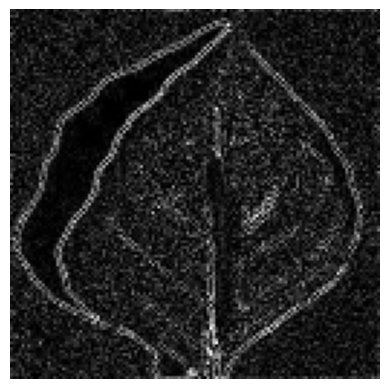

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "/Users/ryanjackson/Desktop/Champlain/2025 Spring/Machine Learning/Final Project/resources/Gaussian Highpass/Bell Pepper/Bell_pepper___healthy_00000_gaussian_hp.jpg"

image = Image.open(image_path)
# Display the image
plt.imshow(image, cmap = 'gray')
plt.axis('off')  # Turn off axis labels
plt.show()

In [9]:
images, labels = train_images_to_array(root_folder)

In [10]:
# Convert lists to numpy arrays
x = np.array(images)
y = np.array(labels)

In [11]:
len(x)

6073

In [12]:
print(y)

['Blueberry' 'Blueberry' 'Blueberry' ... 'Tomato' 'Tomato' 'Tomato']


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## K-NN Implementation

In [15]:
knn_model = knn_classification(x_train, x_test, y_train, y_test, 1)

0.8081515026759983


## Random Forest

In [17]:
random_forest_model = random_forest_classification(x_train, x_test, y_train, y_test, 25)

0.65232606010704


## Evaluation

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [56]:
class EvaluationMetrics:
    def __init__(self, model, X_test, y_test, average='macro', zero_division=0):
        self.y_pred = model.predict(X_test)
        self.accuracy = accuracy_score(y_test, self.y_pred)
        self.precision = precision_score(y_test, self.y_pred, average=average, zero_division=zero_division)
        self.recall = recall_score(y_test, self.y_pred, average=average, zero_division=zero_division)
        self.f1 = f1_score(y_test, self.y_pred, average=average, zero_division=zero_division)

### KNN Evaluation

In [52]:
knn_eval = EvaluationMetrics(knn_model, x_test, y_test)
print("Accuracy:", knn_eval.accuracy)
print("Precision:", knn_eval.precision)
print("Recall:", knn_eval.recall)
print("F1 Score:", knn_eval.f1)

Accuracy: 0.24691358024691357
Precision: 0.18300947059459372
Recall: 0.27876920348489215
F1 Score: 0.1794452265895514


### Random Forest Evaluation

In [54]:
random_forest_eval = EvaluationMetrics(random_forest_model, x_test, y_test)
print("Accuracy:", random_forest_eval.accuracy)
print("Precision:", random_forest_eval.precision)
print("Recall:", random_forest_eval.recall)
print("F1 Score:", random_forest_eval.f1)

Accuracy: 0.4897119341563786
Precision: 0.47891473991819006
Recall: 0.48451361805289334
F1 Score: 0.4808035899791863
